This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python. For example, here's several helpful packages to load in:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

Input data files are available in the "../input/" directory. For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,10)
RANDOM_SEED = 42

In [3]:
# Assigning the column names of the dataframe
columns = ['user','activity','timestamp', 'xaxis', 'yaxis', 'zaxis']

In [4]:
import os

# Getting the working directory
os.getcwd()

'/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152'

In [5]:
# Setting the working directory
os.chdir('/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152') 

In [6]:
# Getting the working directory
os.getcwd()

'/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152'

In [7]:
# Importing and reading the text dataset
df = pd.read_csv("WISDM_ar_v1.1_raw.txt", 
                 header = None,
                 delimiter=",",
                 names = columns,
                 on_bad_lines='skip')

Data Cleaning

In [8]:
# Removing the Nan values in the dataframe
df=df.dropna()

In [9]:
# Removing the ';' in zaxis. This causes the values to be characters/object
df['zaxis'] = df['zaxis'].str.replace(';', '')

In [10]:
# The z axis column is being identified by pandas as an object. This needs to be transformed to float.
df['zaxis'] = df['zaxis'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
df['zaxis'] = df['zaxis'].map(lambda x: x[2:-2])
df['zaxis'] = pd.to_numeric(df['zaxis'],errors='coerce')
df = df.dropna()

Data Visualization

In [11]:
# Shows the first five rows of the dataframe (overview)
df.head()

,user,activity,timestamp,xaxis,yaxis,zaxis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [12]:
# Shows information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082537 entries, 0 to 1086467
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1082537 non-null  int64  
 1   activity   1082537 non-null  object 
 2   timestamp  1082537 non-null  int64  
 3   xaxis      1082537 non-null  float64
 4   yaxis      1082537 non-null  float64
 5   zaxis      1082537 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 57.8+ MB


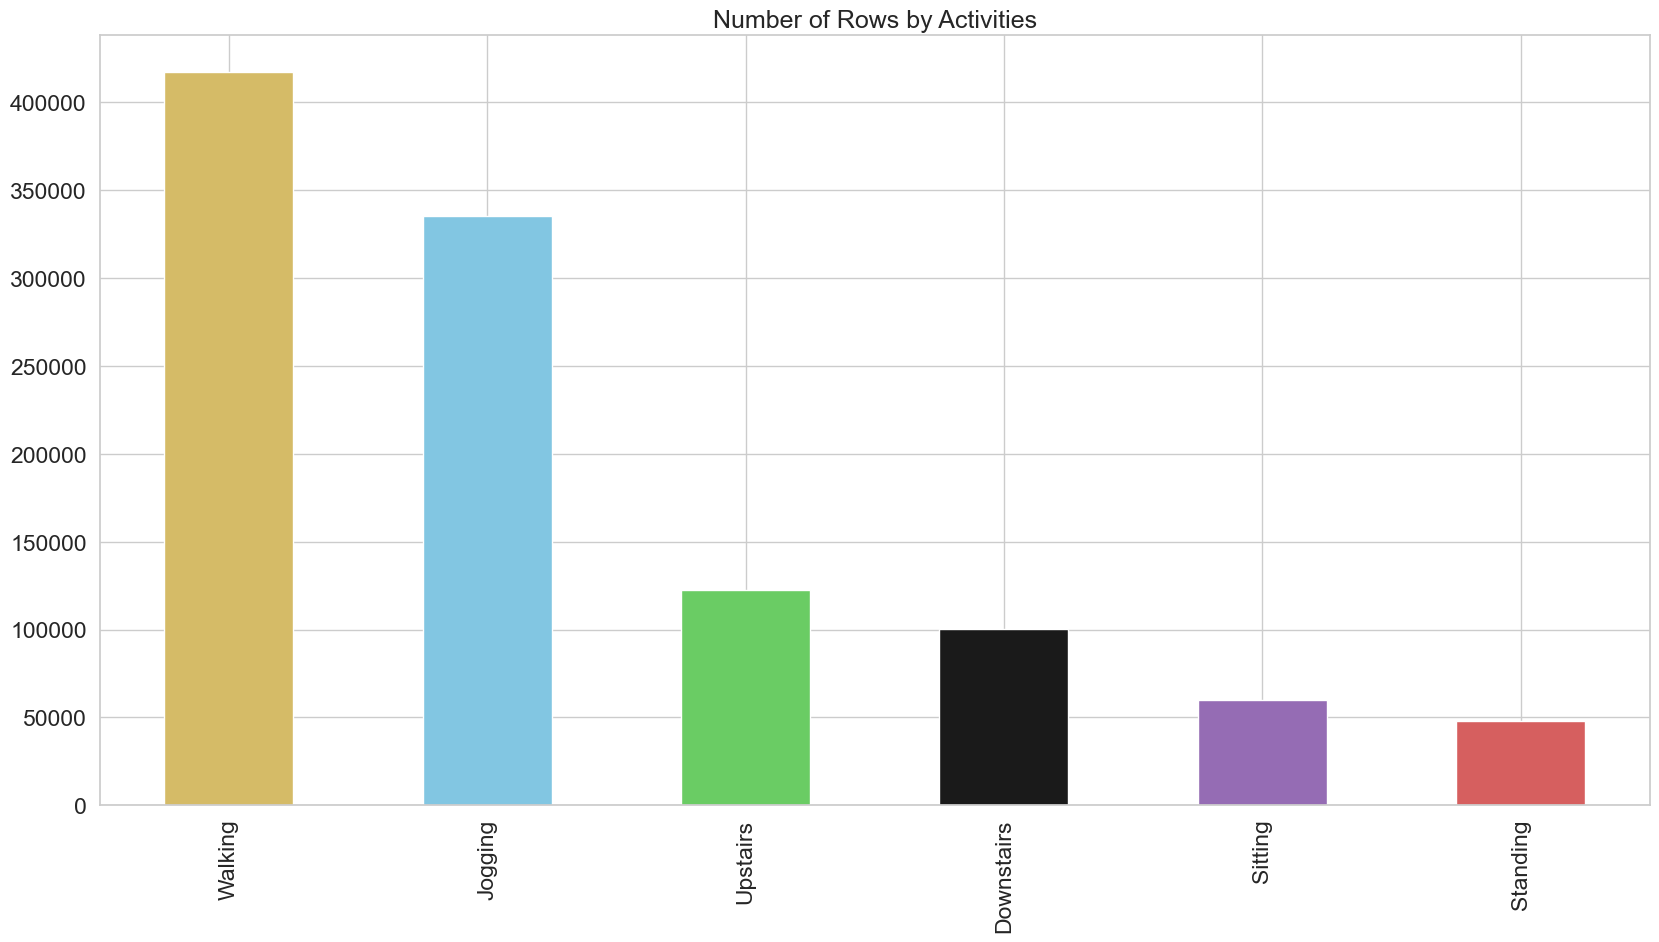

In [13]:
# Checking the distribution of rows per activity
# https://www.kaggle.com/code/adamlouly/exploratory-data-analysis-on-wisdm
df['activity'].value_counts().plot(kind='bar', title='Number of Rows by Activities',
                                   color=['y','c','g','k','m','r']);

In [14]:
# Viewing the signals trends per activity 
# https://www.kaggle.com/code/adamlouly/exploratory-data-analysis-on-wisdm
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['xaxis', 'yaxis', 'zaxis']][:200]
    axis = data["xaxis"].plot(subplots=True, 
                     title=activity,color="b")
    axis = data["yaxis"].plot(subplots=True, 
                 title=activity,color="r")
    axis = data["zaxis"].plot(subplots=True, 
             title=activity,color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

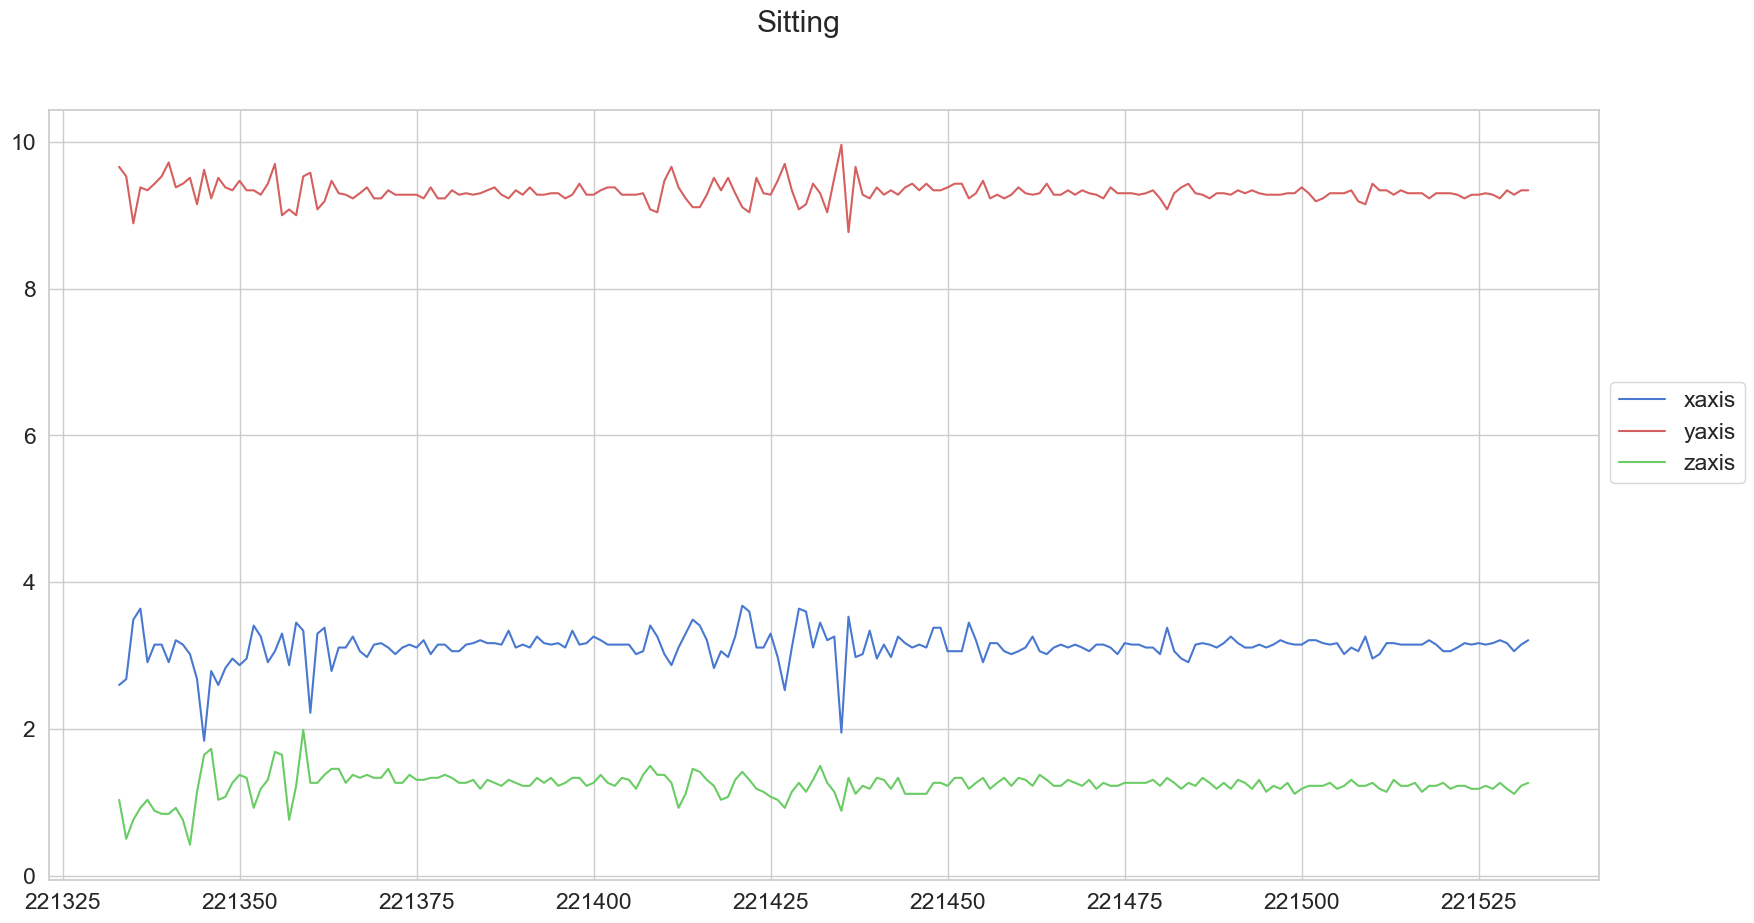

In [15]:
plot_activity("Sitting", df)

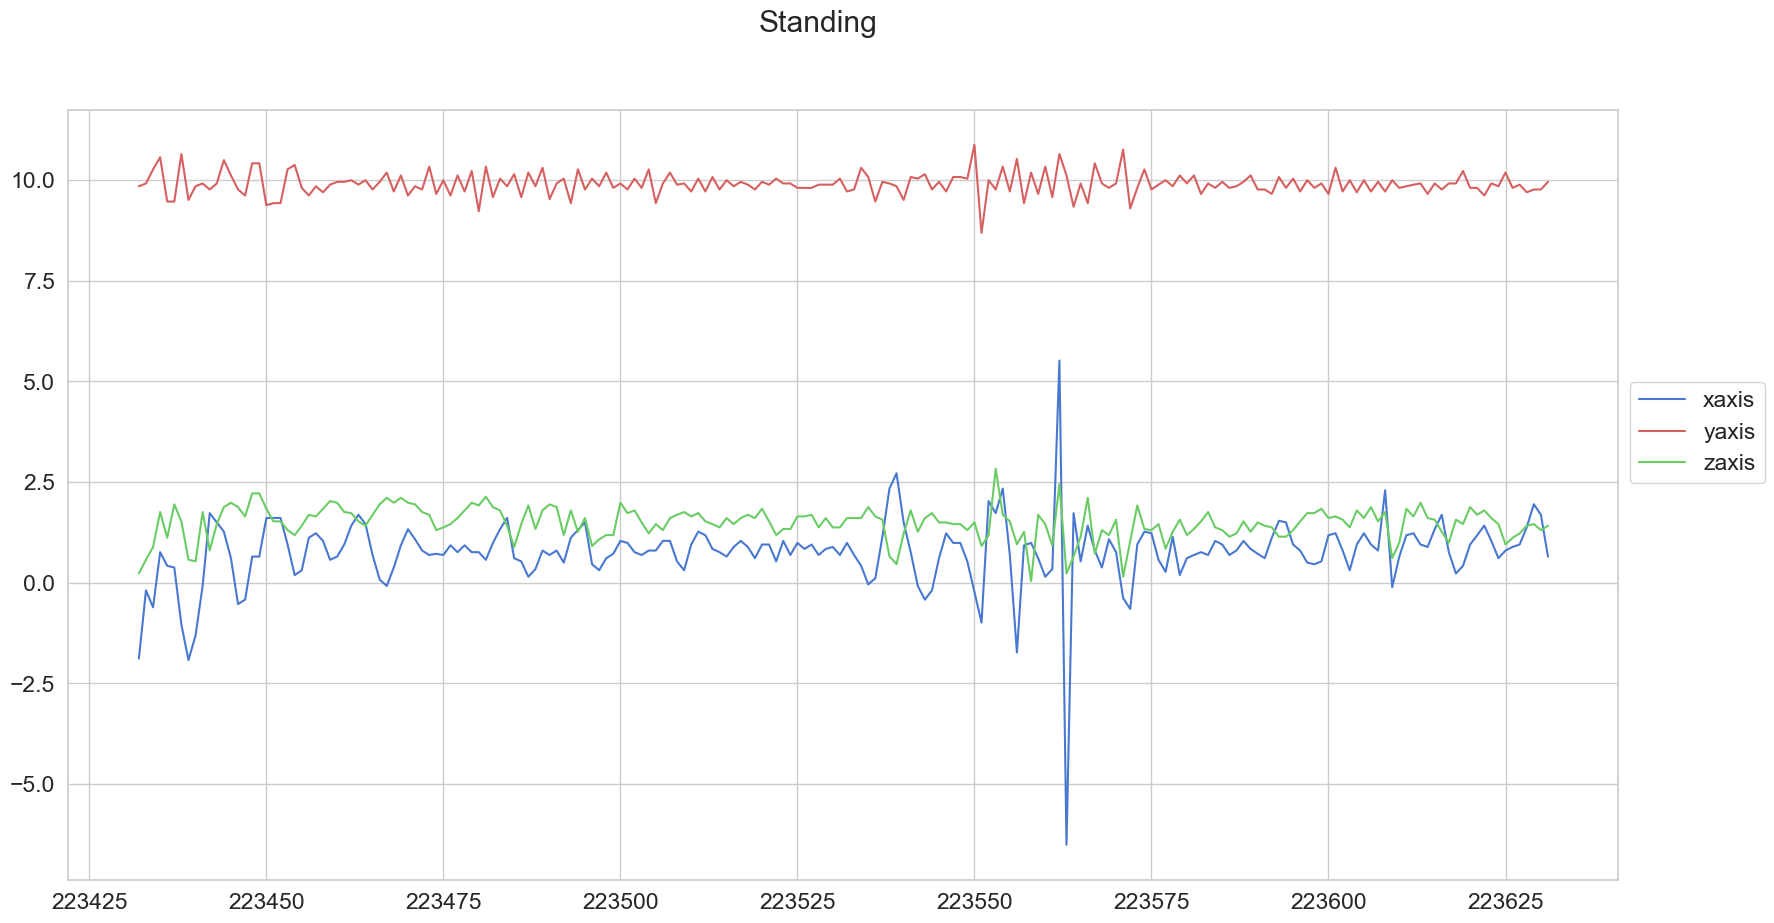

In [16]:
plot_activity("Standing", df)

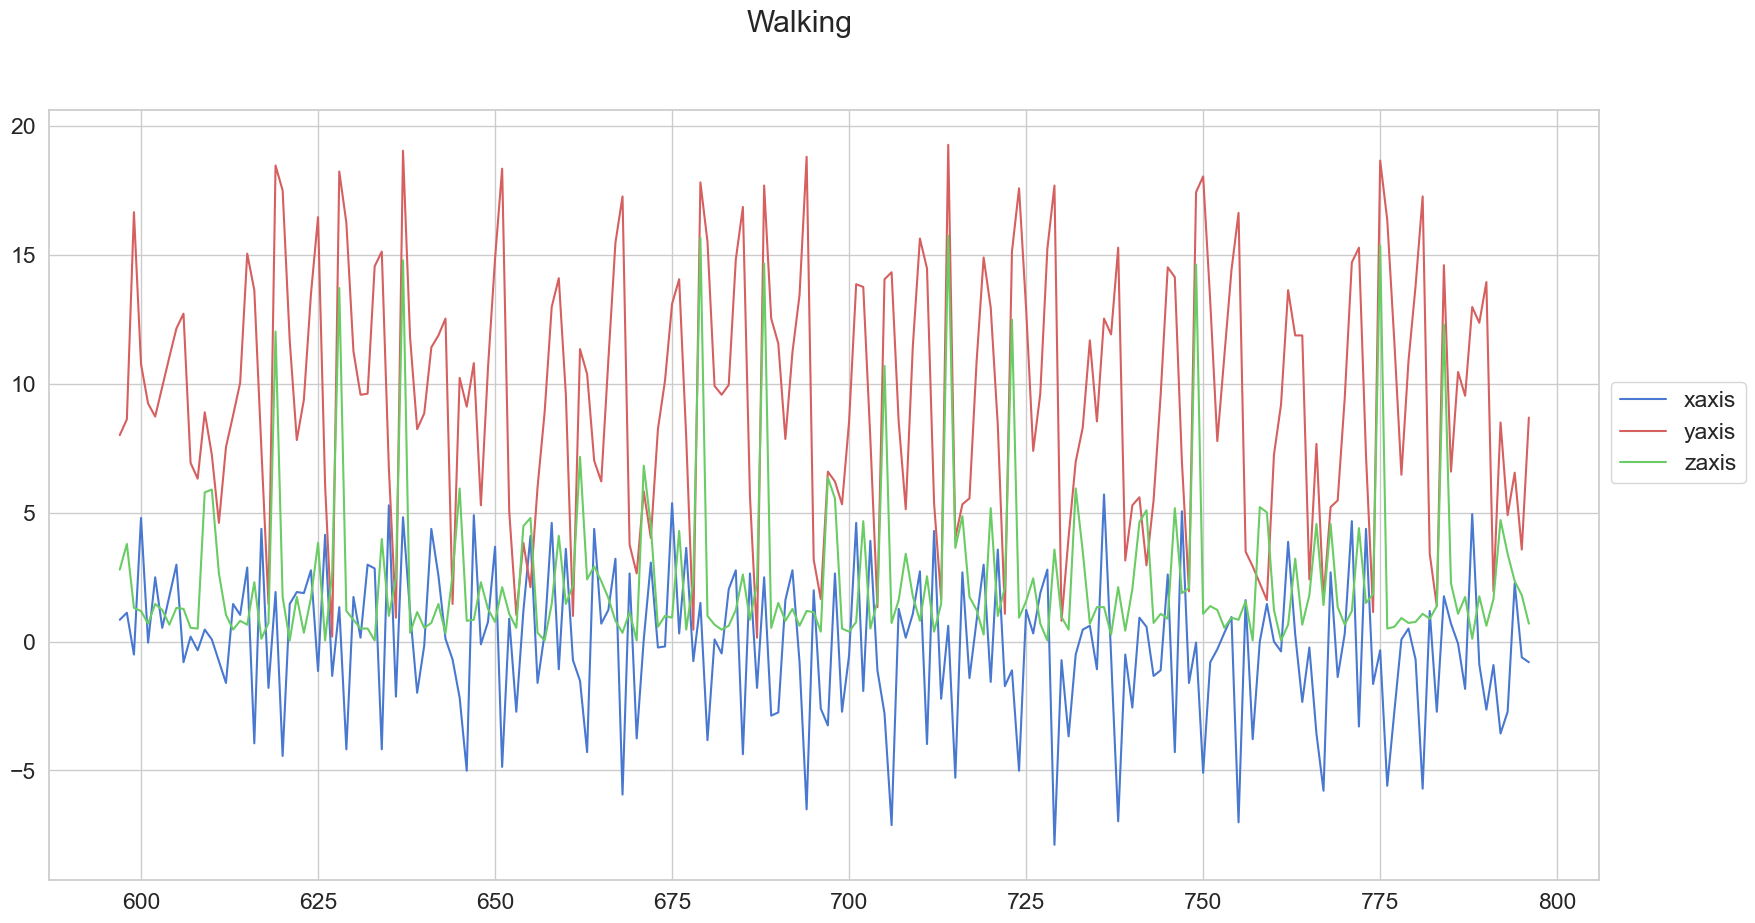

In [17]:
plot_activity("Walking", df)

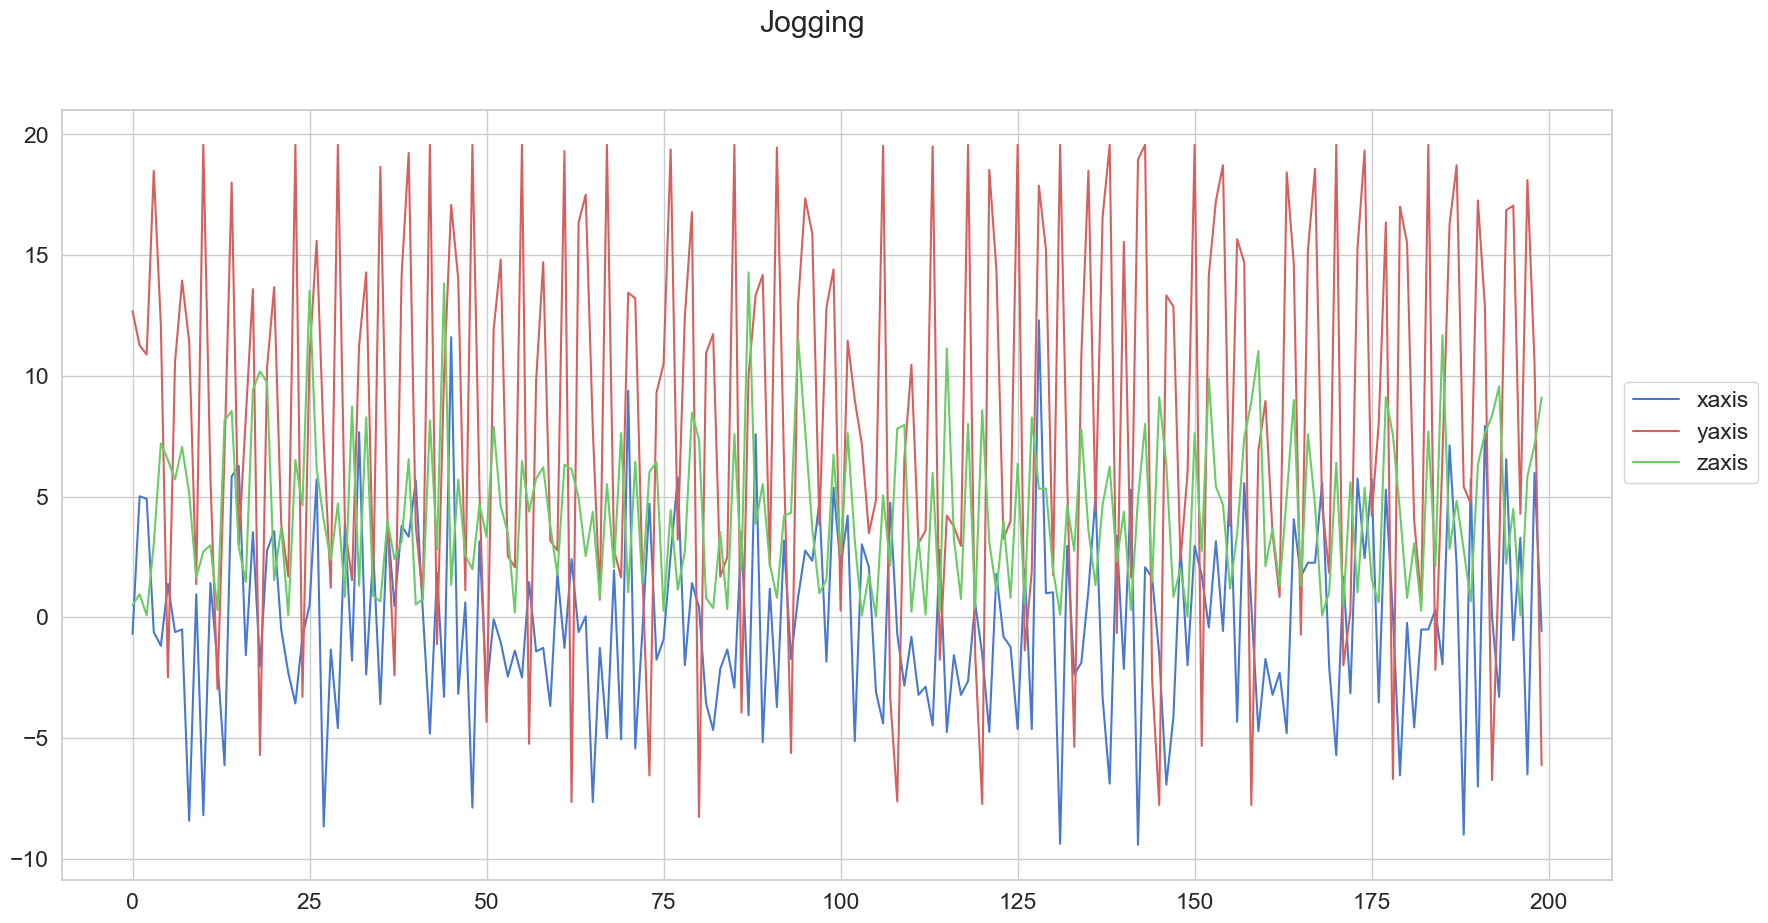

In [18]:
plot_activity("Jogging", df)

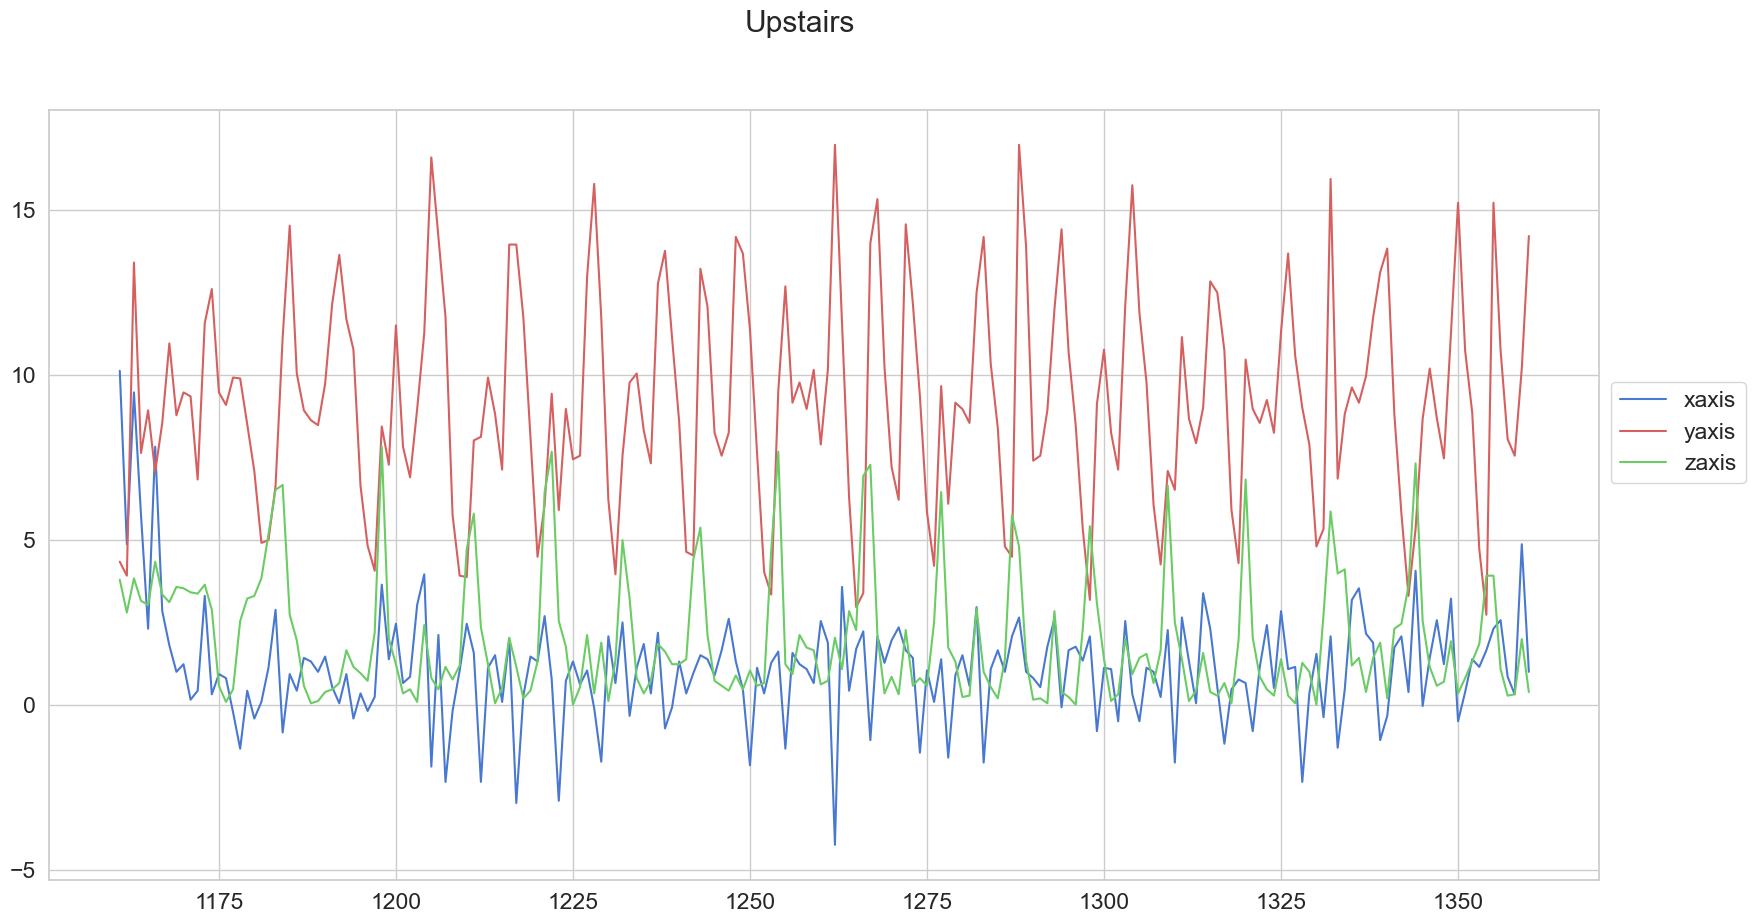

In [19]:
plot_activity("Upstairs", df)

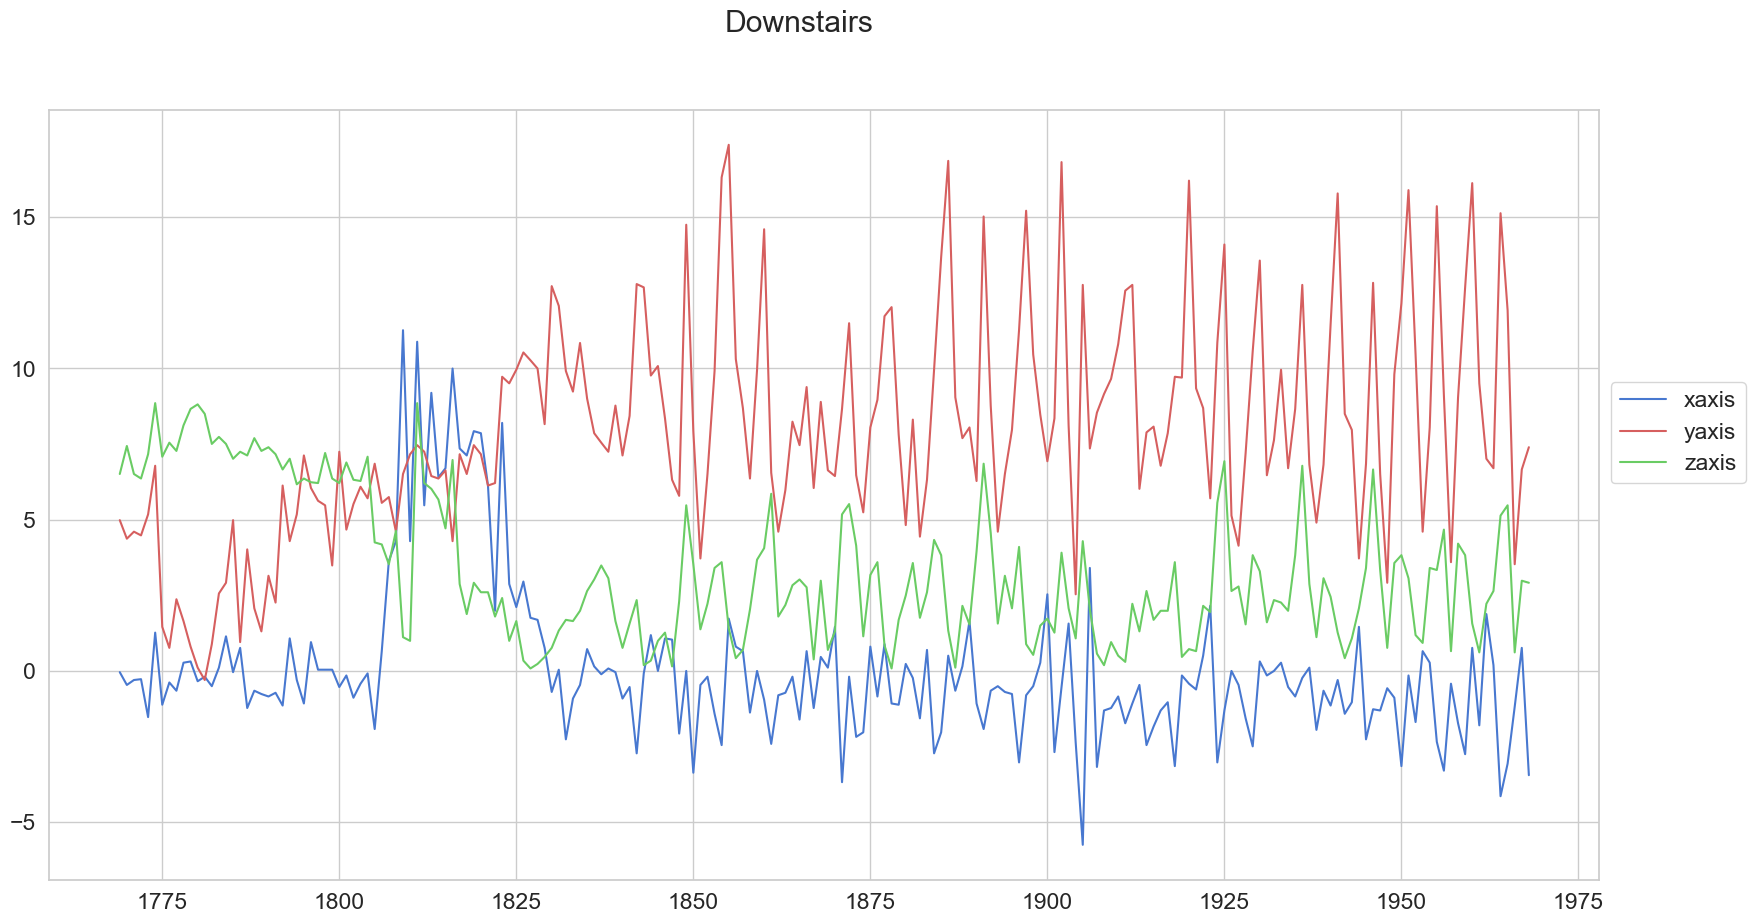

In [20]:
plot_activity("Downstairs", df)

In [21]:
# Identifying the column names of the dataframe
df.keys()

Index(['user', 'activity', 'timestamp', 'xaxis', 'yaxis', 'zaxis'], dtype='object')

Machine Learning Modelling

Splitting the dataset into training and testing sets

In [22]:
# Deleting the 'user' column
df.drop('user', axis = 1, inplace = True)

In [23]:
# Deleting the 'timestamp' column
df.drop('timestamp', axis = 1, inplace = True)

In [24]:
# Overview of the first and last lines of 'activity' column
df.activity

0          Jogging
1          Jogging
2          Jogging
3          Jogging
4          Jogging
            ...   
1086463    Sitting
1086464    Sitting
1086465    Sitting
1086466    Sitting
1086467    Sitting
Name: activity, Length: 1082537, dtype: object

In [25]:
# Creating the input variable 
X = df.drop('activity', axis=1)

In [26]:
# Creating the ouput variable 
y = df.activity

In [27]:
# Importing the function to split the dataframe
from sklearn.model_selection import train_test_split

In [28]:
# Splitting the dataframe into train and test sets
# The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the 
# model becomes really good at classifying the samples in the training set but cannot generalize and make accurate 
# classifications on the data it has not seen before
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [29]:
# To view the dimension of X train 
X_train.shape

(866029, 3)

In [30]:
# To view the dimension of X test
X_test.shape

(216508, 3)

In [31]:
# To view the dimension of of y train
y_train.shape

(866029,)

In [32]:
# To view the dimension of x test
y_test.shape

(216508,)

Spot checking the chosen algorithms

In [33]:
# Importing the model
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
from sklearn import model_selection

In [35]:
# Same seed will get exactly the same pattern of numbers
from random import seed

In [ ]:
# Gradient Boosting Classifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = GradientBoostingClassifier()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

Building Model for Gradient Boosting Classifier

In [37]:
# Assigning into a variable the imported classifier
gbc = GradientBoostingClassifier()

Training the model and make a prediction

In [38]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:
y_pred= gbc.predict(X_test)

In [41]:
print(y_pred)

['Walking' 'Jogging' 'Walking' ... 'Jogging' 'Walking' 'Jogging']


In [40]:
print(X_test)

         xaxis  yaxis     zaxis
15919     6.17   5.83  2.833032
605904   -0.84  -3.64  5.010000
90217    15.43   9.62  1.879608
167217   -8.24  19.04  4.140586
266335   -2.68   0.34  3.595772
...        ...    ...       ...
828368    1.14  -0.04  9.620000
88970     2.79  11.88  5.597963
1070727  -4.21   0.61  1.880000
245148   -1.76  10.65  0.803601
622667   -4.71  19.57  0.080000

[216508 rows x 3 columns]


In [44]:
score = gbc.score(X_test, y_test)
print(score)

0.6144207142461249


Classification report

In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
classes = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix: Gradient Boosting Classifier'):
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, cmap=plt.cm.BuPu, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

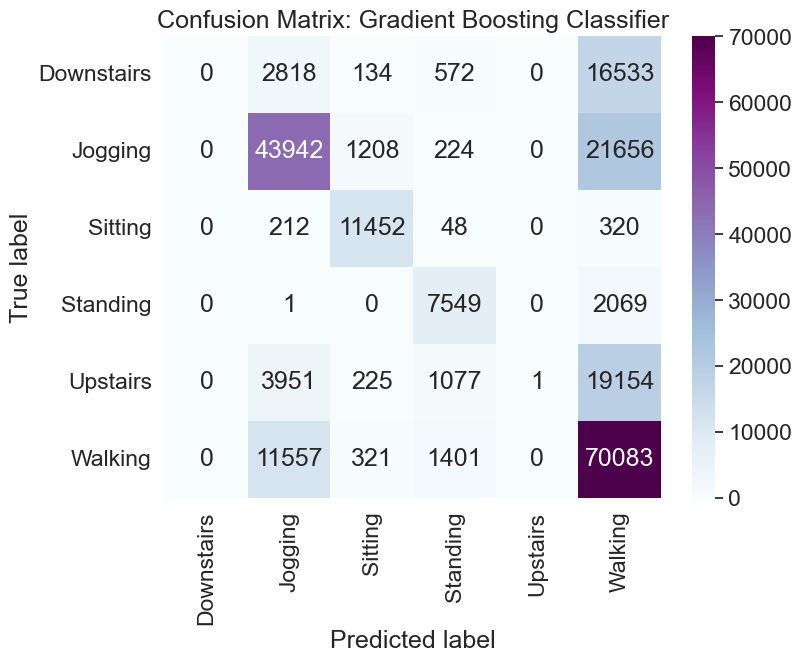

In [47]:
plot_confusion_matrix(y_test, y_pred)

Evaluate the model

In [49]:
# Evaluating the model
from sklearn import metrics
from sklearn.metrics import classification_report

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted', zero_division=1))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted', zero_division=1))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=1))

Accuracy: 0.6144207142461249
Precision: 0.7095324752391247
Recall: 0.6144207142461249
F1-score: 0.5461605690965691


Parameter Tunning using GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
gbc_grs = GradientBoostingClassifier()

In [53]:
params = {'criterion': ['friedman_mse', 'squared_error'], 'loss': ['log_loss', 'deviance', 'exponential']}

In [54]:
grs = GridSearchCV(gbc_grs, param_grid=params)

In [56]:
grs.fit(X_train, y_train)

/Users/jaenagaray/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jaenagaray/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jaenagaray/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/Users/jaenagaray/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueErro

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential']})

In [57]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'criterion': 'friedman_mse', 'loss': 'deviance'}


In [58]:
y_pred_grs=grs.predict(X_test)

In [59]:
print(y_pred_grs)

['Walking' 'Jogging' 'Walking' ... 'Jogging' 'Walking' 'Jogging']


In [63]:
classes = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
def plot_confusion_matrix(y_test, y_pred_grs, title='Confusion Matrix: GridSearch Gradient Boosting Classifier'):
    conf_mat = confusion_matrix(y_test, y_pred_grs)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat, cmap=plt.cm.BuPu, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

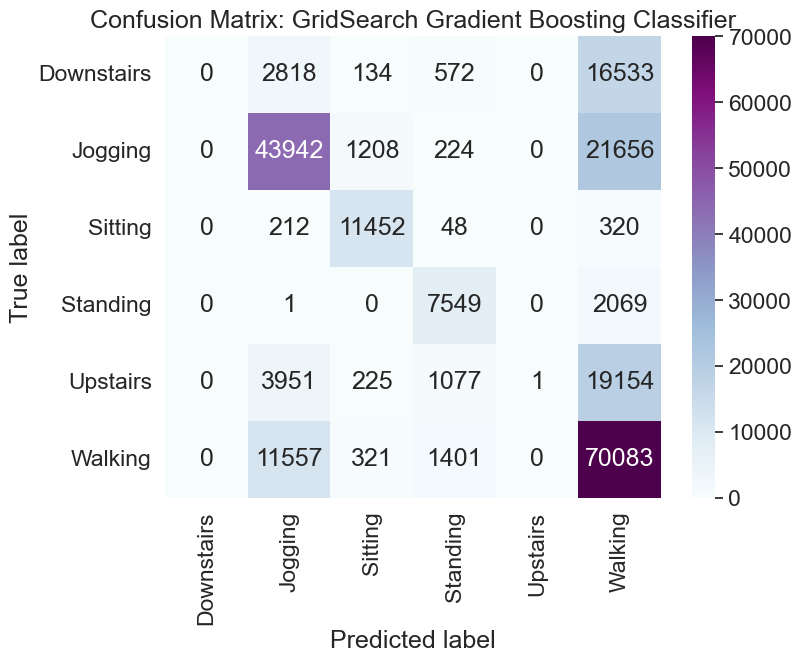

In [64]:
plot_confusion_matrix(y_test, y_pred_grs)

In [62]:
# Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grs))
print("Precision:",metrics.precision_score(y_test, y_pred_grs, average = 'weighted', zero_division=1))
print("Recall:",metrics.recall_score(y_test, y_pred_grs, average = 'weighted', zero_division=1))
print("F1-score:",metrics.f1_score(y_test, y_pred_grs, average = 'weighted', zero_division=1))

Accuracy: 0.6144207142461249
Precision: 0.7095324752391247
Recall: 0.6144207142461249
F1-score: 0.5461605690965691
